In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import pearsonr

In [2]:
# Load the data 
data = pd.read_csv("LeosData.csv", sep=",")
data.head()

,Patient,Age,Sex,WFNS_Group,WFNS,Aneursym_location,DCI,eGOS,SD_Day,Total_SD,Single_SD,Clusters_SD,Mean_LPRX
0,HD-1,55,F,high-grade,4,Acom,Yes,0,4.6,46,24,22,0.18
1,HD-2,38,M,high-grade,4,Acom,Yes,3,1.1,6,6,0,0.10
2,HD-3,28,F,high-grade,5,ICA-R,Yes,3,0.4,4,4,0,-0.04
3,HD-4,47,M,high-grade,5,Acom,No,4,0.8,3,3,0,0.26
4,HD-5,68,F,Low-grade,2,MCA-R,No,6,0.0,9,9,0,0.15


## Data Transformation for the corresponding columns

Age: scalar

Sex: nominal

WFNS_group: ordinal (high o low)

WFNS: ordinal (1-5) 

Aneursym location: nominal

DCI: nominal

eGOS: ordinal (0-8)

SD: scalar

Total_SD: scalar

Sinlge_SD: scalar

Clusters_SD: scalar

L-PRx: scalar

## Descriptive Analysis

<Axes: xlabel='Mean_LPRX', ylabel='Count'>

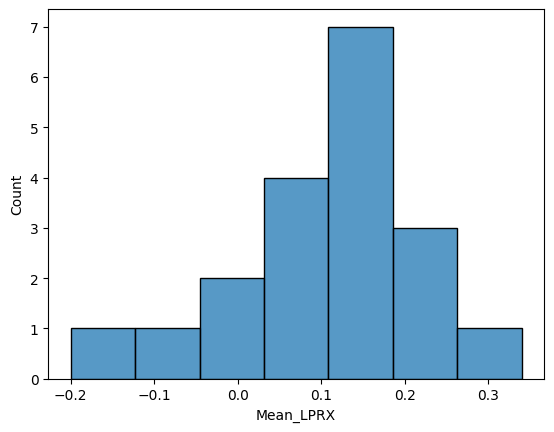

In [29]:
#histogram of the dependent variable
sbn.histplot(data['Mean_LPRX'])

<Axes: xlabel='Age', ylabel='Count'>

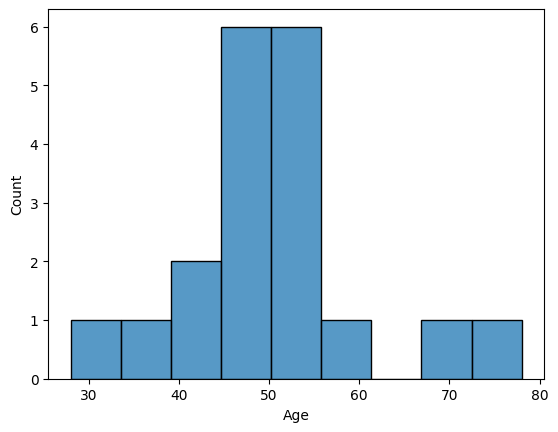

In [39]:
#histogram of the dependent variable
sbn.histplot(data['Age'])

<Axes: xlabel='Single_SD', ylabel='Count'>

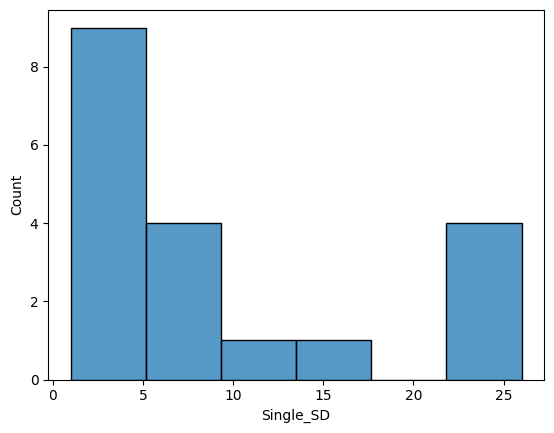

In [40]:
#histogram of the dependent variable
sbn.histplot(data['Single_SD'])

<Axes: xlabel='SD_Day', ylabel='Count'>

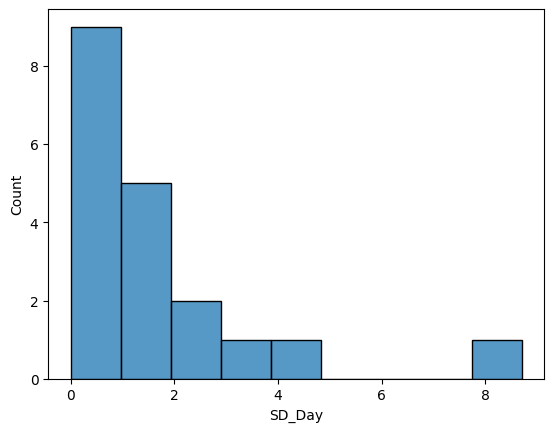

In [41]:
#histogram of the dependent variable
sbn.histplot(data['SD_Day'])


In [ ]:
#histogram of the dependent variable
sbn.histplot(data['SD_Day'])


Pearson Corr Age vs Mean LPRX: 0.36 p-value: 0.13


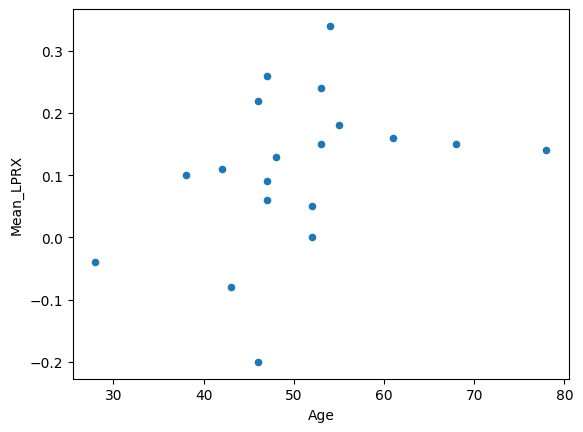

In [32]:
# Relationship with numerical variables (Age vs Mean LPRX)
# Scatter plot
result = data.loc[:,["Age","Mean_LPRX"]]
result.plot.scatter(x="Age", y='Mean_LPRX')
# Correlation
res = stats.pearsonr(data['Age'], data['Mean_LPRX'])
print(f"Pearson Correlation between Age vs Mean LPRX: {res[0]:.2f} p-value: {res[1]:.2f}" )

Pearson Correlation between Age vs SD_Day LPRX: -0.06 p-value: 0.81


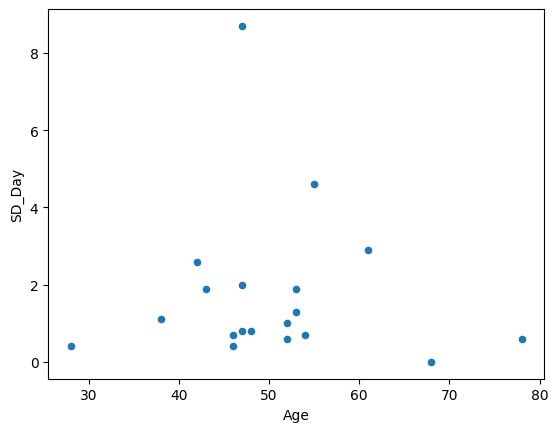

In [34]:
# Relationship with numerical variables (Age vs Mean LPRX)
#Total_SD	Single_SD	Clusters_SD
# Scatter plot
result = data.loc[:,["Age","SD_Day"]]
result.plot.scatter(x="Age", y='SD_Day')
# Correlation
res = stats.pearsonr(data['Age'], data['SD_Day'])
print(f"Pearson Correlation between Age vs SD_Day LPRX: {res[0]:.2f} p-value: {res[1]:.2f}" )

Pearson Correlation between Age vs Single_SD: 0.07 p-value: 0.77


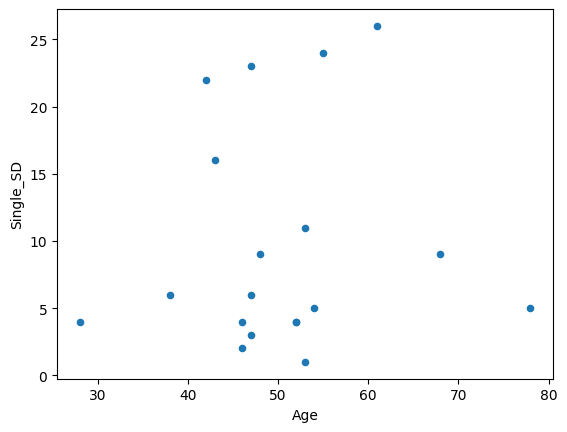

In [35]:
# Relationship with numerical variables (Age vs Mean LPRX)
#Total_SD		Clusters_SD
# Scatter plot
result = data.loc[:,["Age","Single_SD"]]
result.plot.scatter(x="Age", y='Single_SD')
# Correlation
res = stats.pearsonr(data['Age'], data['Single_SD'])
print(f"Pearson Correlation between Age vs Single_SD: {res[0]:.2f} p-value: {res[1]:.2f}" )

Pearson Correlation between Age vs Clusters_SD: 0.07 p-value: 0.78


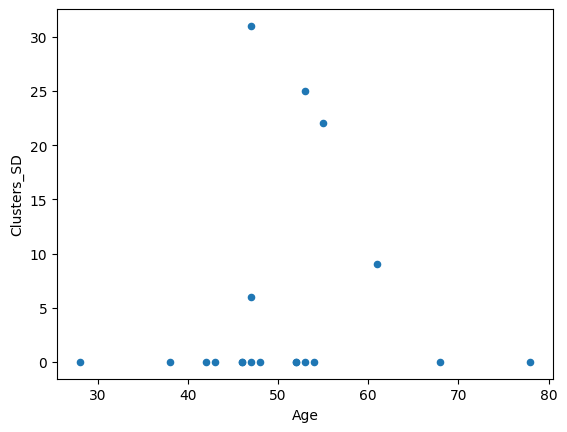

In [36]:
# Relationship with numerical variables (Age vs Mean LPRX)
#Total_SD		
# Scatter plot
result = data.loc[:,["Age","Clusters_SD"]]
result.plot.scatter(x="Age", y='Clusters_SD')
# Correlation
res = stats.pearsonr(data['Age'], data['Clusters_SD'])
print(f"Pearson Correlation between Age vs Clusters_SD: {res[0]:.2f} p-value: {res[1]:.2f}" )

Pearson Correlation between Age vs Total_SD: 0.09 p-value: 0.70


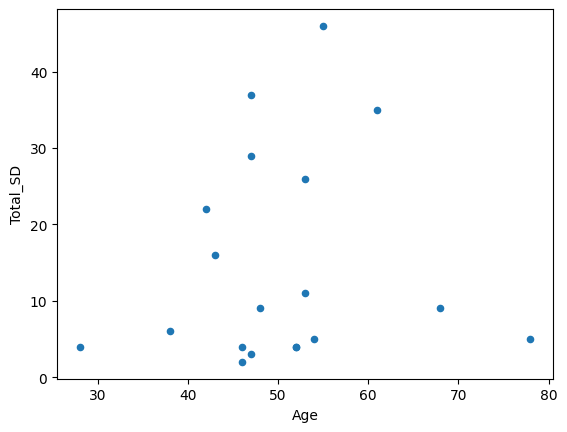

In [37]:
# Relationship with numerical variables (Age vs Total_SD)
# Scatter plot
result = data.loc[:,["Age","Total_SD"]]
result.plot.scatter(x="Age", y='Total_SD')
# Correlation
res = stats.pearsonr(data['Age'], data['Total_SD'])
print(f"Pearson Correlation between Age vs Total_SD: {res[0]:.2f} p-value: {res[1]:.2f}" )

## Pearson Correlation

Linear relationship (continuous variables)

- Positive correlation: As variable 1 increases, variable 2 also increases.
- No correlation.
- Negative correlation: As variable 1 increases, variable 2 decreases.

Normally distributed

Null Hypothesis: No correlation between the variables

p < 0.05 => statistically significant

<Axes: >

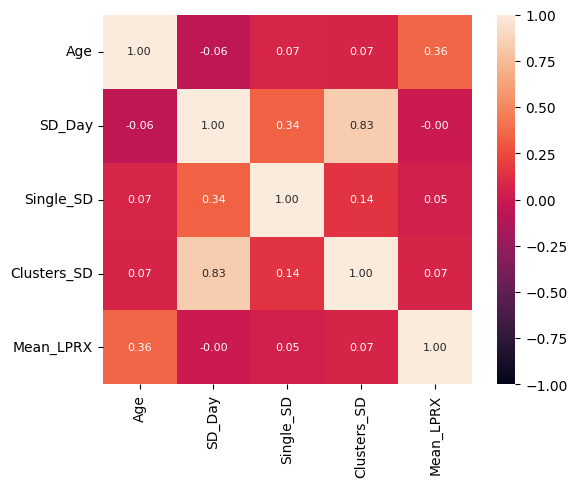

In [38]:
#correlation matrix
sub_data_corr = data.loc[:,
                             ['Age', 'SD_Day', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']]

corrmat = sub_data_corr.corr()
sbn.heatmap(corrmat, cbar=True, annot=True, vmin=-1,vmax=1, square=True, fmt='.2f', annot_kws={'size': 8})

## Spearman Corrrelation

Monotomic variables (continuous or ordinal)
- Positive association: As variable 1 increases, variable 2 does not increase.
- Negative association: As variable 1 increases, variable 2 does not increase.

Non-parametric: does not assume data#s distribution.

Variables are ranked.


In [3]:
# Data Transformation

# Sex (dichotonomous variable) (Ordinal => numeric)
data["Sex_Num"] = 0
data.loc[data["Sex"] ==  "F", 'Sex_Num'] = 0
data.loc[data["Sex"] ==  "M", 'Sex_Num'] = 1

# WFNS_Group (dichotonomous variable) (Ordinal => numeric)
data["WFNS_Group_Num"] = 0
data.loc[data["WFNS_Group"] ==  "high-grade", 'WFNS_Group_Num'] = 1
data.loc[data["WFNS_Group"] ==  "Low-grade", 'WFNS_Group_Num'] = 0

# Aneursym_location (nominal variable, but there is no order in values)
# One hot encodig is needed (categorical/nominal => Numeric)
anae_values_dummies = pd.get_dummies(data["Aneursym_location"], prefix="AL") 
sub_data = pd.concat([data, anae_values_dummies], axis='columns')


# DCI (nominal variable, but there is no order in values)
# get the dummies and store it in a variable
dci_dummies = pd.get_dummies(data["DCI"], prefix="DCI") 
# Concatenate the dummies to original dataframe
sub_data = pd.concat([sub_data, dci_dummies], axis='columns')


#print(sub_data)
sub_data = sub_data.loc[:,
                       ['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS',
                        'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L','AL_MCA-R', 
                        'DCI_No', 'DCI_Probably', 'DCI_Yes',
                        'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
                   ]
sub_data


# new_col = pd.Categorical(data["Aneursym_location"]).codes
# new_col = pd.Series(new_col)
# # # Concatenate the dummies to original dataframe
# data = pd.concat([data, new_col], axis='columns')
# data.rename(columns={0:"Aneursym_location_Num"}, inplace=True)



,Age,Sex_Num,WFNS_Group_Num,WFNS,AL_Acom,AL_ICA-L (Pcom),AL_ICA-R,AL_ICA-R (Pcom),AL_MCA-L,AL_MCA-R,DCI_No,DCI_Probably,DCI_Yes,eGOS,Single_SD,Clusters_SD,Mean_LPRX
0,55,0,1,4,1,0,0,0,0,0,0,0,1,0,24,22,0.18
1,38,1,1,4,1,0,0,0,0,0,0,0,1,3,6,0,0.10
2,28,0,1,5,0,0,1,0,0,0,0,0,1,3,4,0,-0.04
3,47,1,1,5,1,0,0,0,0,0,1,0,0,4,3,0,0.26
4,68,0,0,2,0,0,0,0,0,1,1,0,0,6,9,0,0.15
5,52,0,1,5,0,0,1,0,0,0,0,0,1,0,4,0,0.05
6,78,1,1,5,0,0,0,1,0,0,0,0,1,3,5,0,0.14
7,46,1,1,4,0,0,0,0,1,0,1,0,0,3,4,0,-0.20
8,54,0,1,4,0,0,0,0,1,0,1,0,0,2,5,0,0.34
9,52,1,1,5,1,0,0,0,0,0,0,0,1,0,4,0,0.00


#### WFNS

                 WFNS      eGOS  Total_SD  Single_SD  Clusters_SD  Mean_LPRX
WFNS         1.000000 -0.424379 -0.273892  -0.457001    -0.036524   0.020431
eGOS        -0.424379  1.000000  0.026877   0.269346    -0.280595   0.150055
Total_SD    -0.273892  0.026877  1.000000   0.744124     0.761073   0.053375
Single_SD   -0.457001  0.269346  0.744124   1.000000     0.264616   0.035746
Clusters_SD -0.036524 -0.280595  0.761073   0.264616     1.000000   0.088871
SignificanceResult(statistic=array([[ 1.        , -0.42437888, -0.2738922 , -0.45700068, -0.0365242 ,
         0.02043087],
       [-0.42437888,  1.        ,  0.02687706,  0.26934561, -0.28059526,
         0.15005501],
       [-0.2738922 ,  0.02687706,  1.        ,  0.74412424,  0.76107294,
         0.05337513],
       [-0.45700068,  0.26934561,  0.74412424,  1.        ,  0.26461576,
         0.03574631],
       [-0.0365242 , -0.28059526,  0.76107294,  0.26461576,  1.        ,
         0.0888715 ],
       [ 0.02043087,  0.15005501, 

<Axes: >

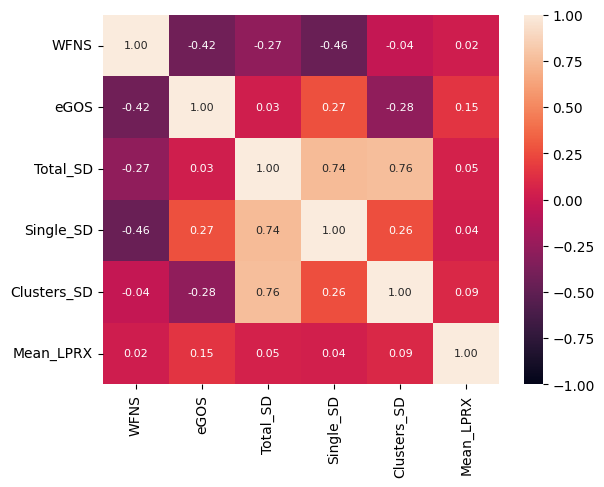

In [5]:
from scipy.stats import spearmanr
# Spearman correlation
col_data  = data.loc[:,["WFNS","eGOS", "Total_SD", "Single_SD", "Clusters_SD", "Mean_LPRX"]]
res = col_data.corr(method="spearman")
print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

In [25]:
print(res.index)
print(res.columns)
print(spearmanr(col_data).pvalue[0][1])
spearmanr(col_data).pvalue

Index(['WFNS', 'eGOS', 'Total_SD', 'Single_SD', 'Clusters_SD', 'Mean_LPRX'], dtype='object')
Index(['WFNS', 'eGOS', 'Total_SD', 'Single_SD', 'Clusters_SD', 'Mean_LPRX'], dtype='object')
0.07014854597541029


array([[0.00000000e+000, 7.01485460e-002, 2.56507333e-001,
        4.91723275e-002, 8.81990999e-001, 9.33836974e-001],
       [7.01485460e-002, 1.67909204e-134, 9.13028005e-001,
        2.64802688e-001, 2.44579874e-001, 5.39771904e-001],
       [2.56507333e-001, 9.13028005e-001, 0.00000000e+000,
        2.59066140e-004, 1.54131532e-004, 8.28195915e-001],
       [4.91723275e-002, 2.64802688e-001, 2.59066140e-004,
        0.00000000e+000, 2.73608492e-001, 8.84488134e-001],
       [8.81990999e-001, 2.44579874e-001, 1.54131532e-004,
        2.73608492e-001, 0.00000000e+000, 7.17501432e-001],
       [9.33836974e-001, 5.39771904e-001, 8.28195915e-001,
        8.84488134e-001, 7.17501432e-001, 1.67909204e-134]])

                  WFNS    DCI_No  DCI_Probably   DCI_Yes
WFNS          1.000000 -0.556084      0.165672  0.481275
DCI_No       -0.556084  1.000000     -0.402200 -0.796628
DCI_Probably  0.165672 -0.402200      1.000000 -0.233021
DCI_Yes       0.481275 -0.796628     -0.233021  1.000000
SignificanceResult(statistic=array([[ 1.        , -0.55608392,  0.16567175,  0.48127498],
       [-0.55608392,  1.        , -0.40219983, -0.79662751],
       [ 0.16567175, -0.40219983,  1.        , -0.23302069],
       [ 0.48127498, -0.79662751, -0.23302069,  1.        ]]), pvalue=array([[0.00000000e+000, 1.34220898e-002, 4.97880449e-001,
        3.69597493e-002],
       [1.34220898e-002, 0.00000000e+000, 8.78051531e-002,
        4.46770928e-005],
       [4.97880449e-001, 8.78051531e-002, 1.67909204e-134,
        3.37023466e-001],
       [3.69597493e-002, 4.46770928e-005, 3.37023466e-001,
        0.00000000e+000]]))


<Axes: >

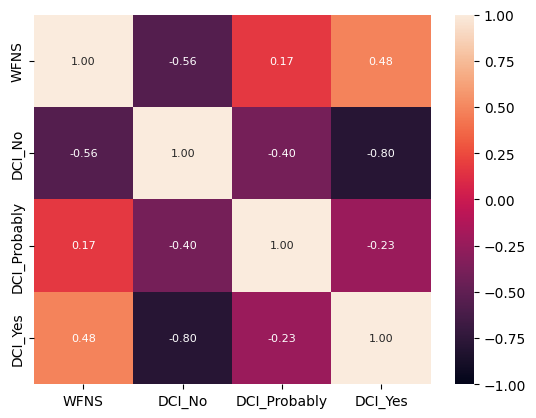

In [37]:
from scipy.stats import spearmanr
# Spearman correlation
col_data  = sub_data.loc[:,["WFNS","DCI_No", 'DCI_Probably', 'DCI_Yes']]
res = col_data.corr(method="spearman")
print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

### WFNS Group

SignificanceResult(statistic=array([[ 1.        , -0.48472521, -0.02193756, -0.19752557,  0.14075619,
         0.05457842],
       [-0.48472521,  1.        ,  0.02687706,  0.26934561, -0.28059526,
         0.15005501],
       [-0.02193756,  0.02687706,  1.        ,  0.74412424,  0.76107294,
         0.05337513],
       [-0.19752557,  0.26934561,  0.74412424,  1.        ,  0.26461576,
         0.03574631],
       [ 0.14075619, -0.28059526,  0.76107294,  0.26461576,  1.        ,
         0.0888715 ],
       [ 0.05457842,  0.15005501,  0.05337513,  0.03574631,  0.0888715 ,
         1.        ]]), pvalue=array([[0.00000000e+000, 3.54343647e-002, 9.28969088e-001,
        4.17609763e-001, 5.65451456e-001, 8.24379590e-001],
       [3.54343647e-002, 1.67909204e-134, 9.13028005e-001,
        2.64802688e-001, 2.44579874e-001, 5.39771904e-001],
       [9.28969088e-001, 9.13028005e-001, 0.00000000e+000,
        2.59066140e-004, 1.54131532e-004, 8.28195915e-001],
       [4.17609763e-001, 2.64802688

<Axes: >

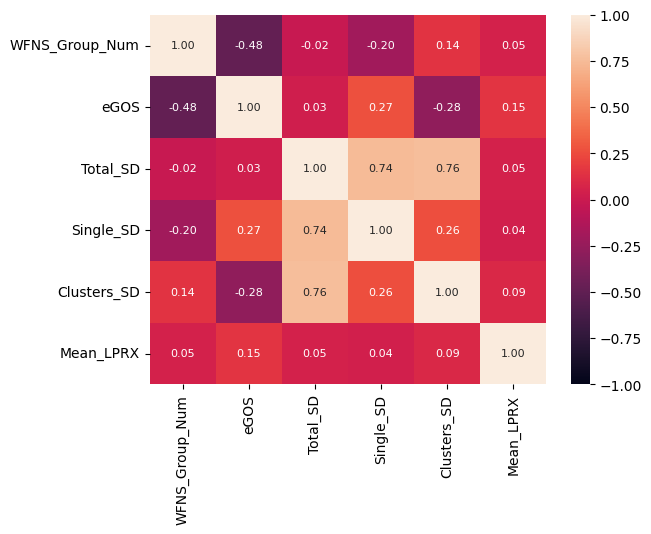

In [42]:

from scipy.stats import spearmanr
# Spearman correlation
col_data  = data.loc[:,["WFNS_Group_Num","eGOS", "Total_SD", "Single_SD", "Clusters_SD", "Mean_LPRX"]]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

SignificanceResult(statistic=array([[ 1.        , -0.40219983, -0.79662751, -0.50964719],
       [-0.40219983,  1.        , -0.23302069,  0.20498002],
       [-0.79662751, -0.23302069,  1.        ,  0.40599897],
       [-0.50964719,  0.20498002,  0.40599897,  1.        ]]), pvalue=array([[0.00000000e+000, 8.78051531e-002, 4.46770928e-005,
        2.58134210e-002],
       [8.78051531e-002, 1.67909204e-134, 3.37023466e-001,
        3.99887556e-001],
       [4.46770928e-005, 3.37023466e-001, 0.00000000e+000,
        8.45709941e-002],
       [2.58134210e-002, 3.99887556e-001, 8.45709941e-002,
        0.00000000e+000]]))


<Axes: >

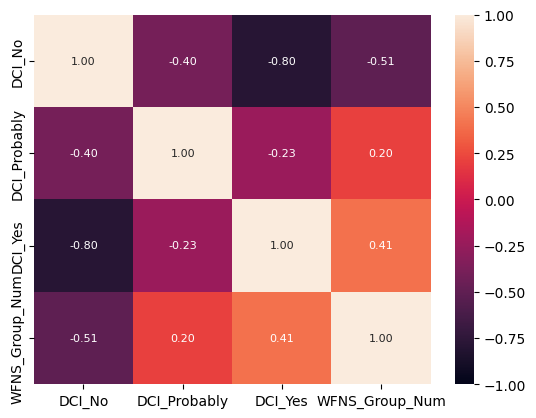

In [47]:
# Spearman correlation
col_data = sub_data.loc[:,[
                        'DCI_No', 'DCI_Probably', 'DCI_Yes',
                        "WFNS_Group_Num"]]
res = col_data.corr(method="spearman")
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

### eGOS

<Axes: >

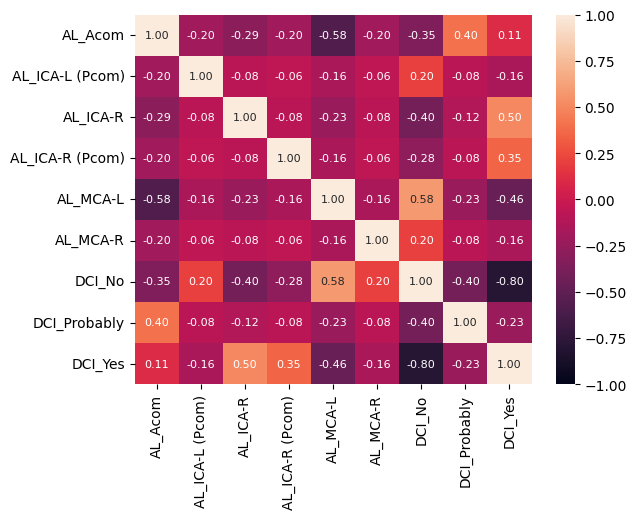

In [12]:

from scipy.stats import spearmanr
# Spearman correlation
col_data  = data.loc[:,["eGOS","eGOS", "Total_SD", "Single_SD", "Clusters_SD", "Mean_LPRX"]]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

### DCI

In [52]:
# sub_data["Total_SD"] = data["Total_SD"]
# sub_data["Single_SD"] = data["Single_SD"]
# sub_data["Clusters_SD"] = data["Clusters_SD"]
# print(data.columns)
# print(sub_data.columns)

SignificanceResult(statistic=array([[ 1.        ,  0.74412424,  0.76107294,  0.05337513,  0.03913145,
         0.28329591, -0.22860337],
       [ 0.74412424,  1.        ,  0.26461576,  0.03574631,  0.18595682,
        -0.09447385, -0.13514373],
       [ 0.76107294,  0.26461576,  1.        ,  0.0888715 ,  0.        ,
         0.22216198, -0.14667696],
       [ 0.05337513,  0.03574631,  0.0888715 ,  1.        ,  0.24338769,
         0.04698743, -0.2895414 ],
       [ 0.03913145,  0.18595682,  0.        ,  0.24338769,  1.        ,
        -0.40219983, -0.79662751],
       [ 0.28329591, -0.09447385,  0.22216198,  0.04698743, -0.40219983,
         1.        , -0.23302069],
       [-0.22860337, -0.13514373, -0.14667696, -0.2895414 , -0.79662751,
        -0.23302069,  1.        ]]), pvalue=array([[0.00000000e+000, 2.59066140e-004, 1.54131532e-004,
        8.28195915e-001, 8.73629227e-001, 2.39876043e-001,
        3.46521209e-001],
       [2.59066140e-004, 0.00000000e+000, 2.73608492e-001,
   

<Axes: >

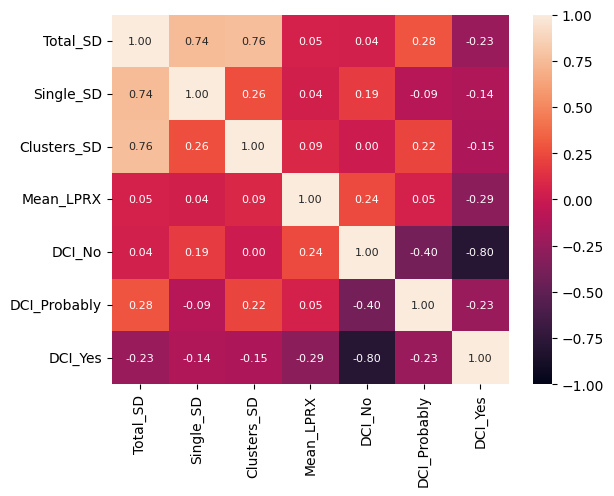

In [54]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'Total_SD', 'Single_SD', 'Clusters_SD', "Mean_LPRX",
                        'DCI_No', 'DCI_Probably', 'DCI_Yes']]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

### Age

PearsonRResult(statistic=0.16266405703924341, pvalue=0.5058241541624848)
PearsonRResult(statistic=0.07279618952178298, pvalue=0.7671062097624051)
PearsonRResult(statistic=0.07023994293680139, pvalue=0.7750802744583688)
PearsonRResult(statistic=0.3584184151607953, pvalue=0.13185397663703582)


<Axes: >

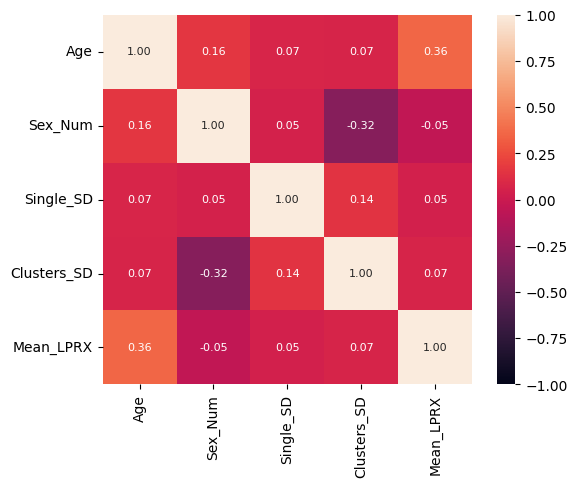

In [59]:
#correlation matrix
sub_data_corr = sub_data.loc[:,
                             ['Age', 'Sex_Num','Single_SD', 'Clusters_SD', 'Mean_LPRX']]

corrmat = sub_data_corr.corr()
#print(res.head())
_result = pearsonr(sub_data['Age'], sub_data['Sex_Num'])
print(_result)
_result = pearsonr(sub_data['Age'], sub_data['Single_SD'])
print(_result)
_result = pearsonr(sub_data['Age'], sub_data['Clusters_SD'])
print(_result)
_result = pearsonr(sub_data['Age'], sub_data['Mean_LPRX'])
print(_result)
sbn.heatmap(corrmat, cbar=True, annot=True, vmin=-1,vmax=1, square=True, fmt='.2f', annot_kws={'size': 8})

SignificanceResult(statistic=array([[ 1.        ,  0.09850093, -0.23772295,  0.04880626, -0.10992727,
         0.02073622],
       [ 0.09850093,  1.        , -0.48472521, -0.50964719,  0.20498002,
         0.40599897],
       [-0.23772295, -0.48472521,  1.        ,  0.50269532,  0.06469887,
        -0.57666373],
       [ 0.04880626, -0.50964719,  0.50269532,  1.        , -0.40219983,
        -0.79662751],
       [-0.10992727,  0.20498002,  0.06469887, -0.40219983,  1.        ,
        -0.23302069],
       [ 0.02073622,  0.40599897, -0.57666373, -0.79662751, -0.23302069,
         1.        ]]), pvalue=array([[1.67909204e-134, 6.88283827e-001, 3.27082091e-001,
        8.42719435e-001, 6.54157536e-001, 9.32850260e-001],
       [6.88283827e-001, 0.00000000e+000, 3.54343647e-002,
        2.58134210e-002, 3.99887556e-001, 8.45709941e-002],
       [3.27082091e-001, 3.54343647e-002, 1.67909204e-134,
        2.82614964e-002, 7.92438538e-001, 9.74779905e-003],
       [8.42719435e-001, 2.58134210

<Axes: >

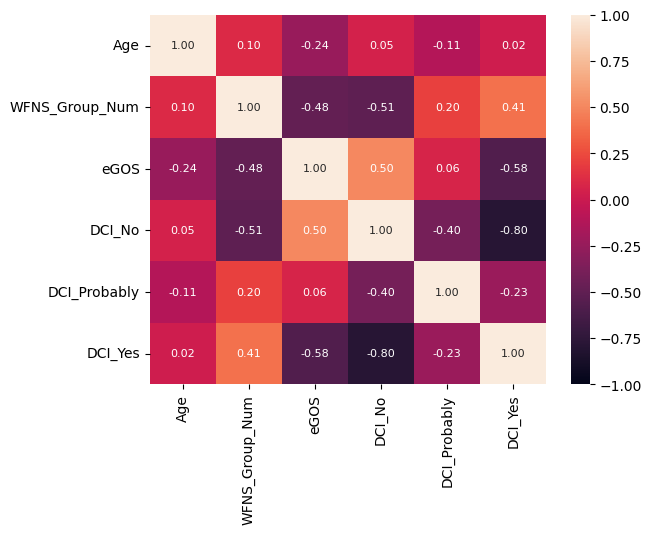

In [56]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'Age', 'WFNS_Group_Num', 'eGOS',
                        'DCI_No', 'DCI_Probably', 'DCI_Yes']]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

### Sex

SignificanceResult(statistic=array([[ 1.        ,  0.16292459,  0.08819171,  0.06959098,  0.10645628,
        -0.16137588,  0.        ,  0.16854997, -0.32539569,  0.03580574],
       [ 0.16292459,  1.        ,  0.80823366, -0.42437888, -0.45700068,
        -0.0365242 ,  0.02043087, -0.55608392,  0.16567175,  0.48127498],
       [ 0.08819171,  0.80823366,  1.        , -0.48472521, -0.19752557,
         0.14075619,  0.05457842, -0.50964719,  0.20498002,  0.40599897],
       [ 0.06959098, -0.42437888, -0.48472521,  1.        ,  0.26934561,
        -0.28059526,  0.15005501,  0.50269532,  0.06469887, -0.57666373],
       [ 0.10645628, -0.45700068, -0.19752557,  0.26934561,  1.        ,
         0.26461576,  0.03574631,  0.18595682, -0.09447385, -0.13514373],
       [-0.16137588, -0.0365242 ,  0.14075619, -0.28059526,  0.26461576,
         1.        ,  0.0888715 ,  0.        ,  0.22216198, -0.14667696],
       [ 0.        ,  0.02043087,  0.05457842,  0.15005501,  0.03574631,
         0.08887

<Axes: >

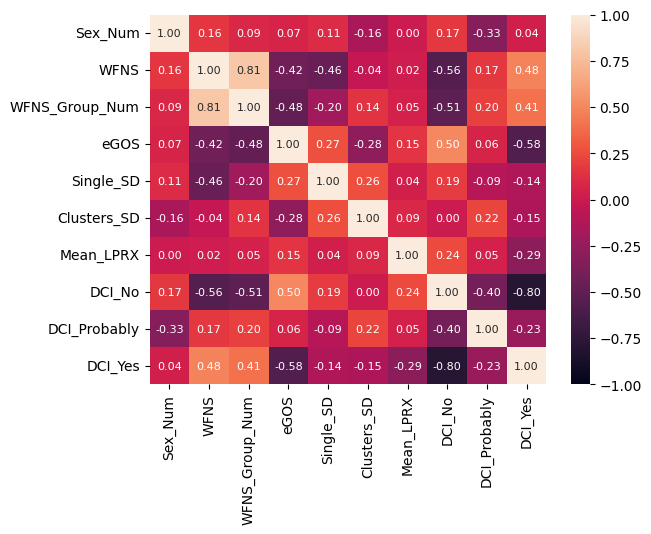

In [60]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'Sex_Num', 'WFNS', 'WFNS_Group_Num', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX',
                        'DCI_No', 'DCI_Probably', 'DCI_Yes']]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

### Aneurysm location

SignificanceResult(statistic=array([[ 1.        , -0.20100756, -0.29250897, -0.20100756, -0.57936546,
        -0.20100756, -0.35227273,  0.40219983,  0.10863102],
       [-0.20100756,  1.        , -0.08084521, -0.05555556, -0.16012815,
        -0.05555556,  0.20100756, -0.08084521, -0.16012815],
       [-0.29250897, -0.08084521,  1.        , -0.08084521, -0.23302069,
        -0.08084521, -0.40219983, -0.11764706,  0.50487816],
       [-0.20100756, -0.05555556, -0.08084521,  1.        , -0.16012815,
        -0.05555556, -0.2763854 , -0.08084521,  0.34694433],
       [-0.57936546, -0.16012815, -0.23302069, -0.16012815,  1.        ,
        -0.16012815,  0.57936546, -0.23302069, -0.46153846],
       [-0.20100756, -0.05555556, -0.08084521, -0.05555556, -0.16012815,
         1.        ,  0.20100756, -0.08084521, -0.16012815],
       [-0.35227273,  0.20100756, -0.40219983, -0.2763854 ,  0.57936546,
         0.20100756,  1.        , -0.40219983, -0.79662751],
       [ 0.40219983, -0.08084521,

<Axes: >

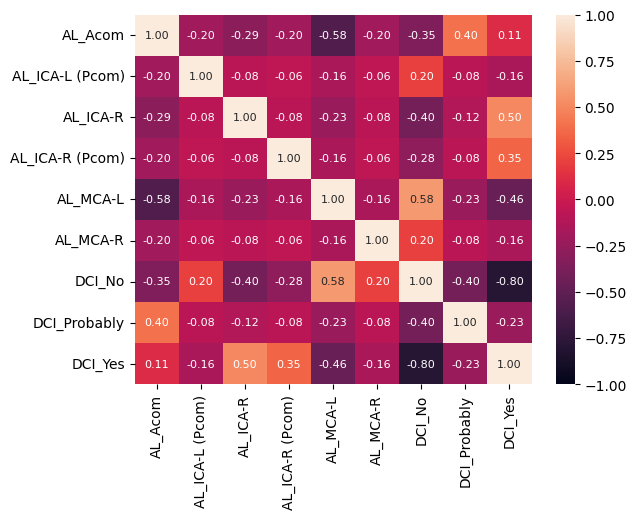

In [62]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R',
                        #'Sex_Num', 'WFNS', 'WFNS_Group_Num', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX',
                        'DCI_No', 'DCI_Probably', 'DCI_Yes']]
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

SignificanceResult(statistic=array([[ 1.        , -0.20100756, -0.29250897, -0.20100756, -0.57936546,
        -0.20100756,  0.25844328,  0.41191402,  0.50964719, -0.08043125,
         0.13702081,  0.21341459,  0.34074277],
       [-0.20100756,  1.        , -0.08084521, -0.05555556, -0.16012815,
        -0.05555556,  0.248452  , -0.29600225, -0.39440532, -0.04446005,
         0.10820158, -0.13878747,  0.        ],
       [-0.29250897, -0.08084521,  1.        , -0.08084521, -0.23302069,
        -0.08084521, -0.32539569,  0.3976122 ,  0.20498002, -0.29114492,
        -0.28342156, -0.20196544, -0.37589948],
       [-0.20100756, -0.05555556, -0.08084521,  1.        , -0.16012815,
        -0.05555556,  0.248452  ,  0.27323285,  0.14085904, -0.04446005,
        -0.06492095, -0.13878747,  0.04305203],
       [-0.57936546, -0.16012815, -0.23302069, -0.16012815,  1.        ,
        -0.16012815, -0.19096397, -0.49221305, -0.36539907,  0.12814749,
        -0.03118701,  0.10667415, -0.18613376],
 

<Axes: >

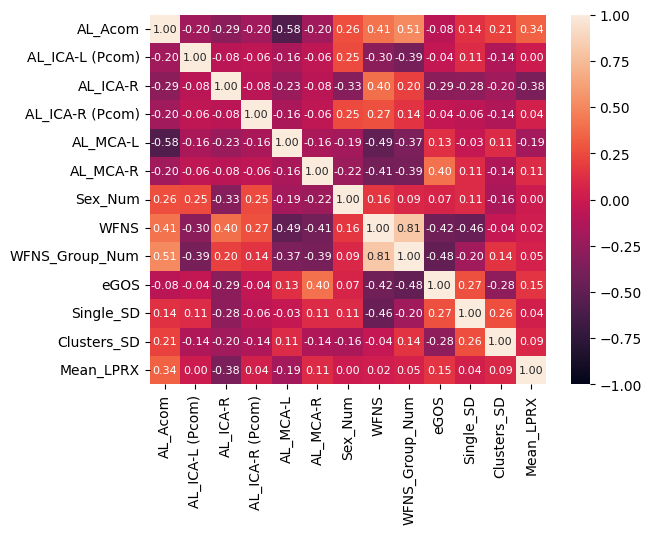

In [63]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R',
                        'Sex_Num', 'WFNS', 'WFNS_Group_Num'
                        ]] # 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX'
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

SignificanceResult(statistic=array([[ 1.        , -0.20100756, -0.29250897, -0.20100756, -0.57936546,
        -0.20100756, -0.08043125,  0.13702081,  0.21341459,  0.34074277],
       [-0.20100756,  1.        , -0.08084521, -0.05555556, -0.16012815,
        -0.05555556, -0.04446005,  0.10820158, -0.13878747,  0.        ],
       [-0.29250897, -0.08084521,  1.        , -0.08084521, -0.23302069,
        -0.08084521, -0.29114492, -0.28342156, -0.20196544, -0.37589948],
       [-0.20100756, -0.05555556, -0.08084521,  1.        , -0.16012815,
        -0.05555556, -0.04446005, -0.06492095, -0.13878747,  0.04305203],
       [-0.57936546, -0.16012815, -0.23302069, -0.16012815,  1.        ,
        -0.16012815,  0.12814749, -0.03118701,  0.10667415, -0.18613376],
       [-0.20100756, -0.05555556, -0.08084521, -0.05555556, -0.16012815,
         1.        ,  0.40014042,  0.10820158, -0.13878747,  0.10763009],
       [-0.08043125, -0.04446005, -0.29114492, -0.04446005,  0.12814749,
         0.40014

<Axes: >

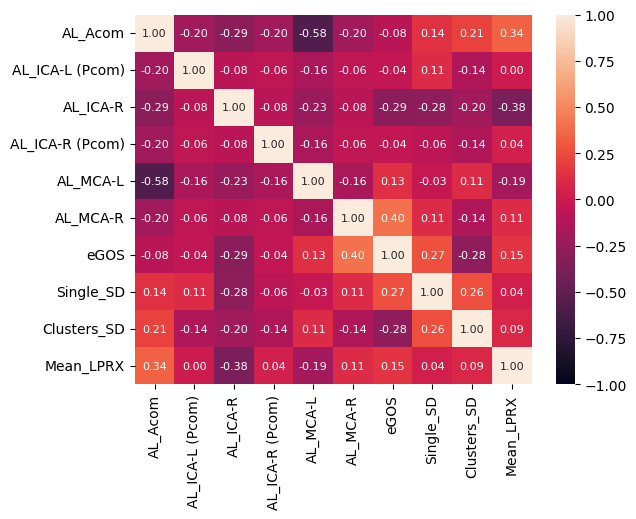

In [64]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
col_data = sub_data.loc[:,[
                        'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R',
                        'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX'
                        ]] 
res = col_data.corr(method="spearman")
#print(res.head())
print(spearmanr(col_data))
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

## Point Biserial Correlation

In [15]:
#stats.pointbiserialr(a, b)

In [16]:

# def performChi2test(col1,col2):
#     print("-------------------------------------------------")
#     print(f"-------- {col1} vs {col2} ------")
#     print("-------------------------------------------------")
#     # Cross tabulation between GENDER and APPROVE_LOAN
#     CrosstabResult=pd.crosstab(index=sub_data[col1],columns=sub_data[col2])
#     print(CrosstabResult)    
#     # importing the required function
#     from scipy.stats import chi2_contingency
#     # Performing Chi-sq test (independence between 2 categorical values)
#     ChiSqResult = chi2_contingency(CrosstabResult)    
#     # Assumption(H0): The two columns are NOT related to each other
#     # P-Value is the Probability of H0 being True
#     # If P-value is > 0.05 then only we Accept the assumption(H0)
#     print(f"The P-Value of the ChiSq Test is: {ChiSqResult[1]:.4f}")
#     x = "Variables not correlated to each other" if ChiSqResult[1] > 0.05 else "Variables correlated to each other"
#     print(x)    

# #performChi2test("Sex","Aneursym_location")
# #performChi2test("Sex","DCI")
# performChi2test("Aneursym_location","DCI")

## Linear Regression

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

sub_data.columns

X = sub_data.loc[:,['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'AL_Acom',
       'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L',
       'AL_MCA-R',  'DCI_No', 'DCI_Probably', 'DCI_Yes', 'eGOS',
       'Single_SD', 'Clusters_SD']]

Y = sub_data["Mean_LPRX"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
    
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
print(f"Intercept: {model.intercept_} \n Coefficients: {model.coef_} \n R2 = {model.score(X, Y)}")

Intercept: -6.705919280917437 
 Coefficients: [ 6.78973653e-02 -2.11286913e-01 -1.61481451e-01  4.97251084e-01
  2.91204193e-01  1.43524083e+00  1.20215211e-01 -2.82133415e+00
  9.74673912e-01 -6.66133815e-16 -5.15390720e-01 -3.43598444e-01
  8.58989164e-01  4.75533161e-01 -5.56335411e-03 -1.06777912e-03] 
 R2 = -5.9741291738008355


In [18]:
import statsmodels.api as sm


X = sub_data.loc[:,[
        'Age', 
        'Sex_Num', 
        #'WFNS_Group_Num', 
        #'WFNS', 
        'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R', 'AL_Acom',
        #'DCI_NUM', 
        'DCI_No', 'DCI_Probably', 'DCI_Yes', 
        #'eGOS',
        #'Single_SD', 
        #'Clusters_SD'
       ]]
Y = sub_data["Mean_LPRX"]
#Y = sub_data["Mean_LPRX"] clusters
#Y = sub_data["Mean_LPRX"]
#Y = sub_data["Mean_LPRX"]
# y = x1 + x2 + x3 +...
#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Mean_LPRX   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.8803
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.574
Time:                        14:49:52   Log-Likelihood:                 18.782
No. Observations:                  19   AIC:                            -17.56
Df Residuals:                       9   BIC:                            -8.120
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0031      0.005     

c:\Users\vegaarellano\Documents\Github\ComputerVision-main\ComputerVision-main\venv-data-analysis\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [19]:
#display regression coefficients and R-squared value of model
